In [1]:
from bot.trade_live import client, trade_live
from bot.rules import *
from bot.config.utils import read_tickers, read_config

Iteration 1


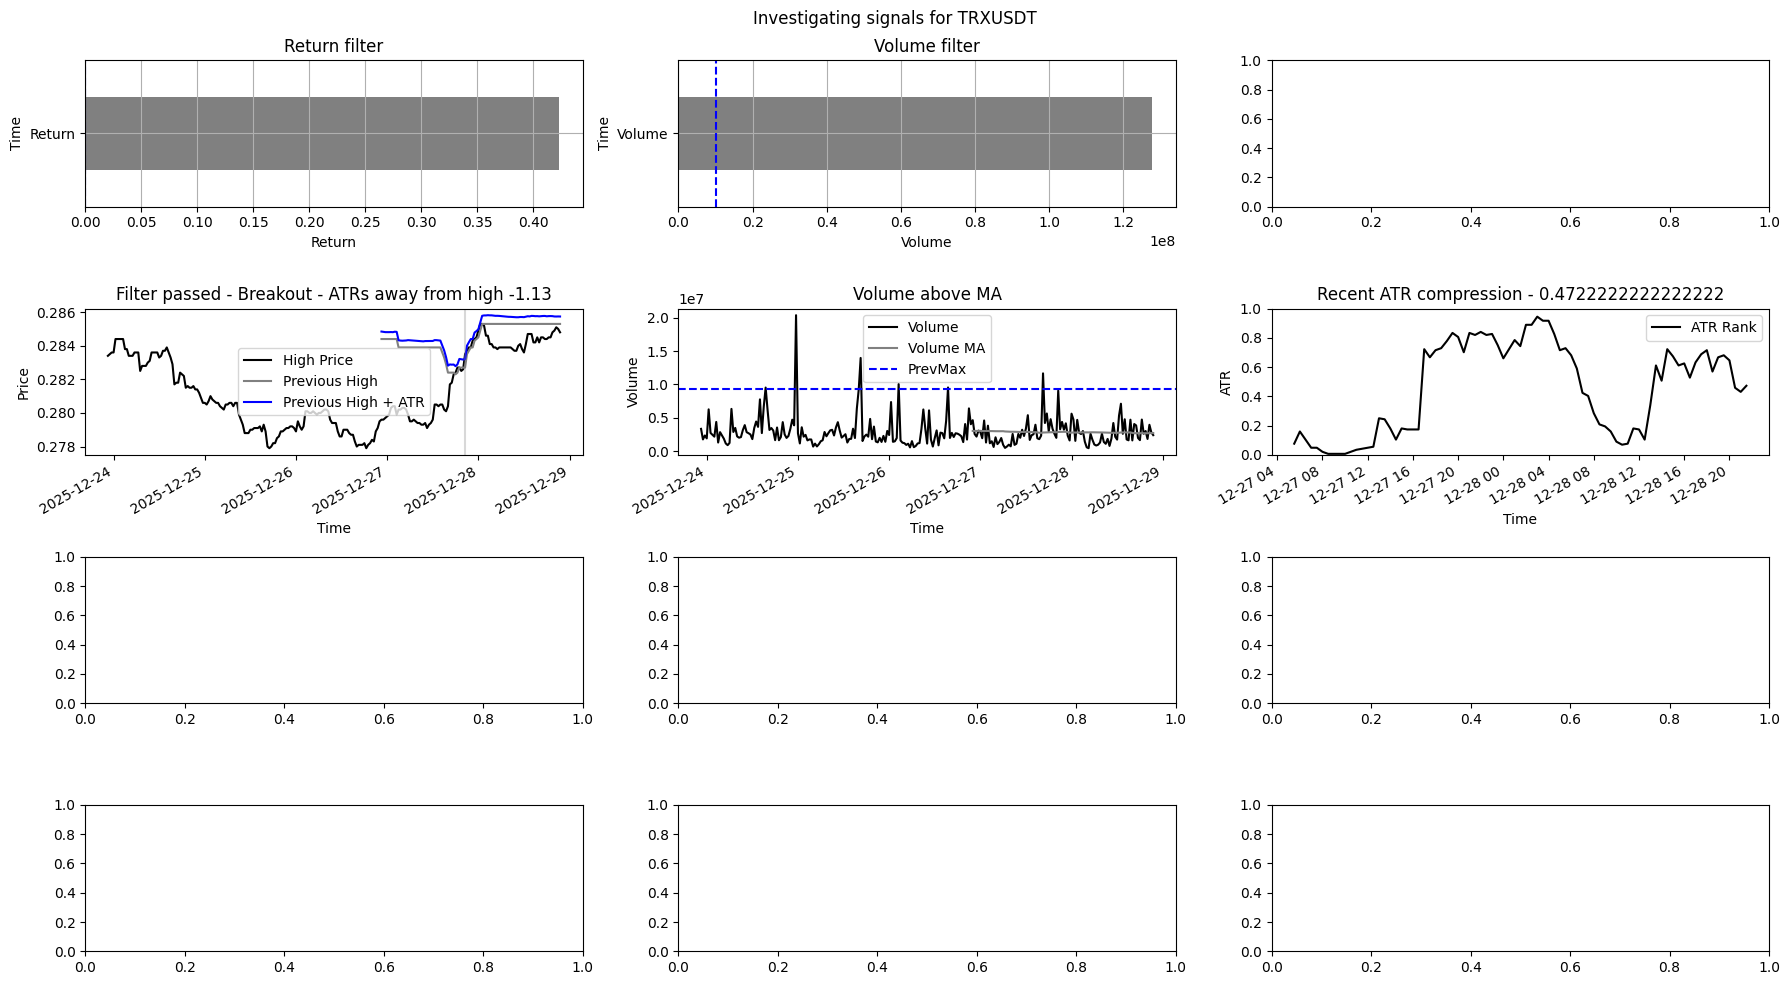

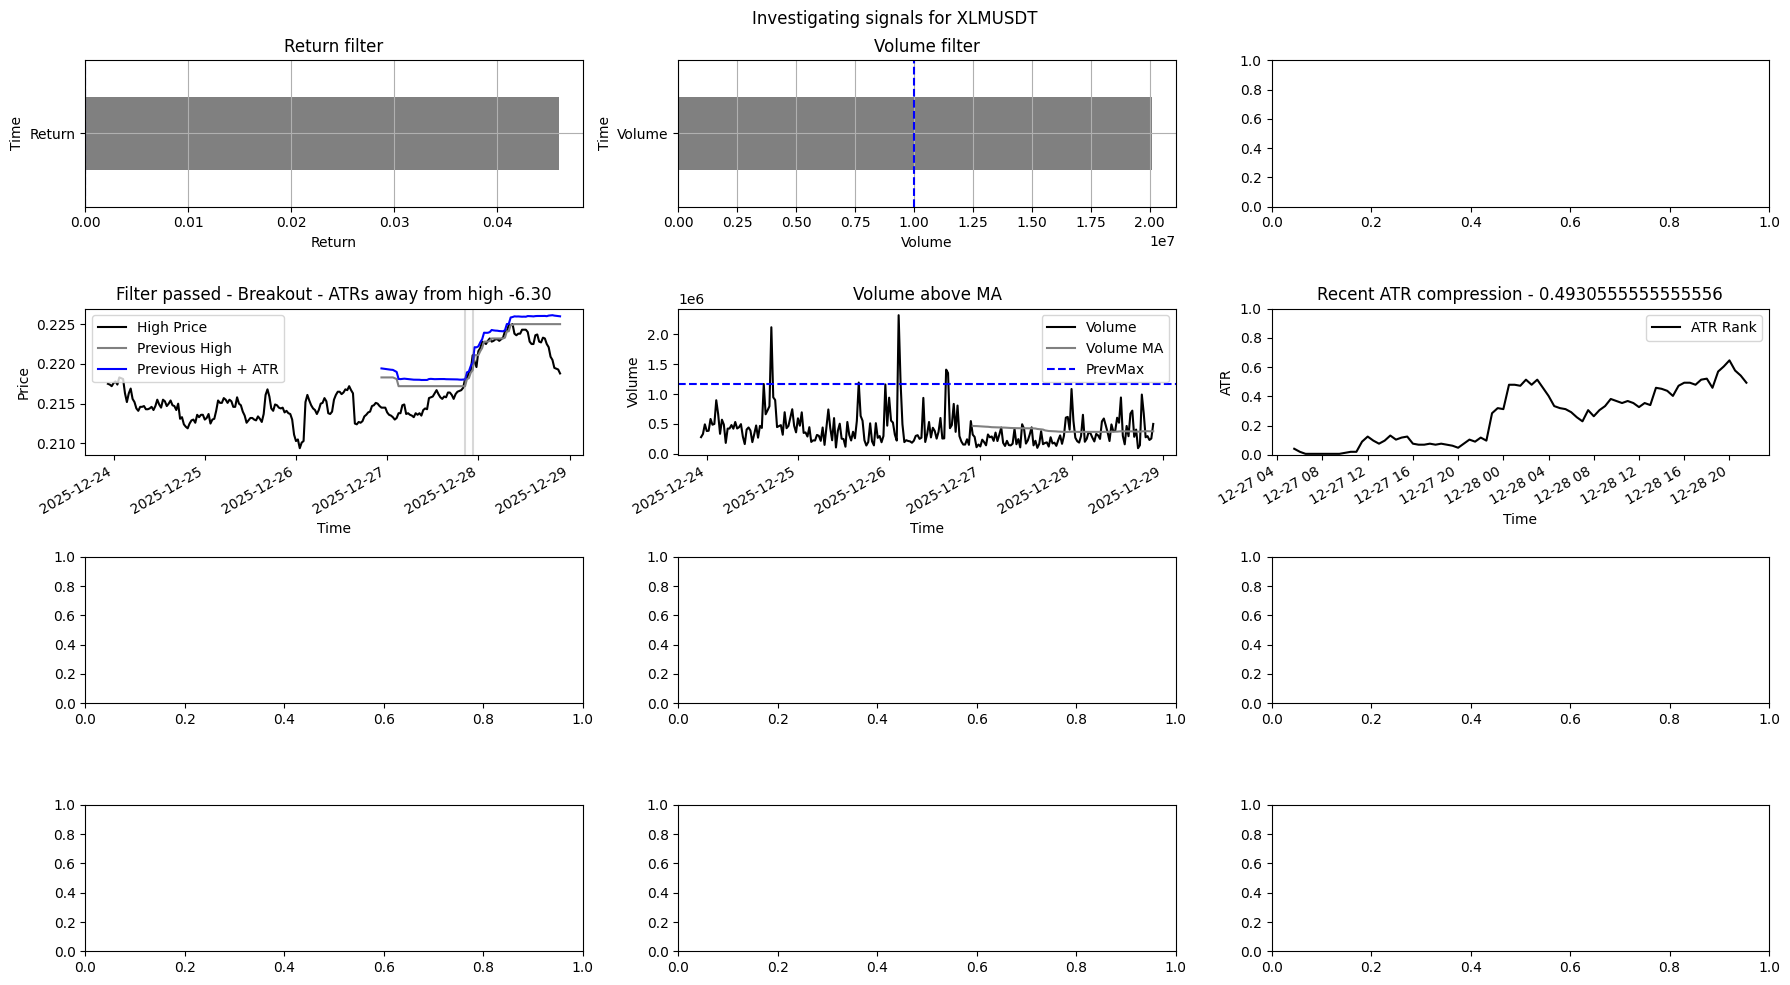

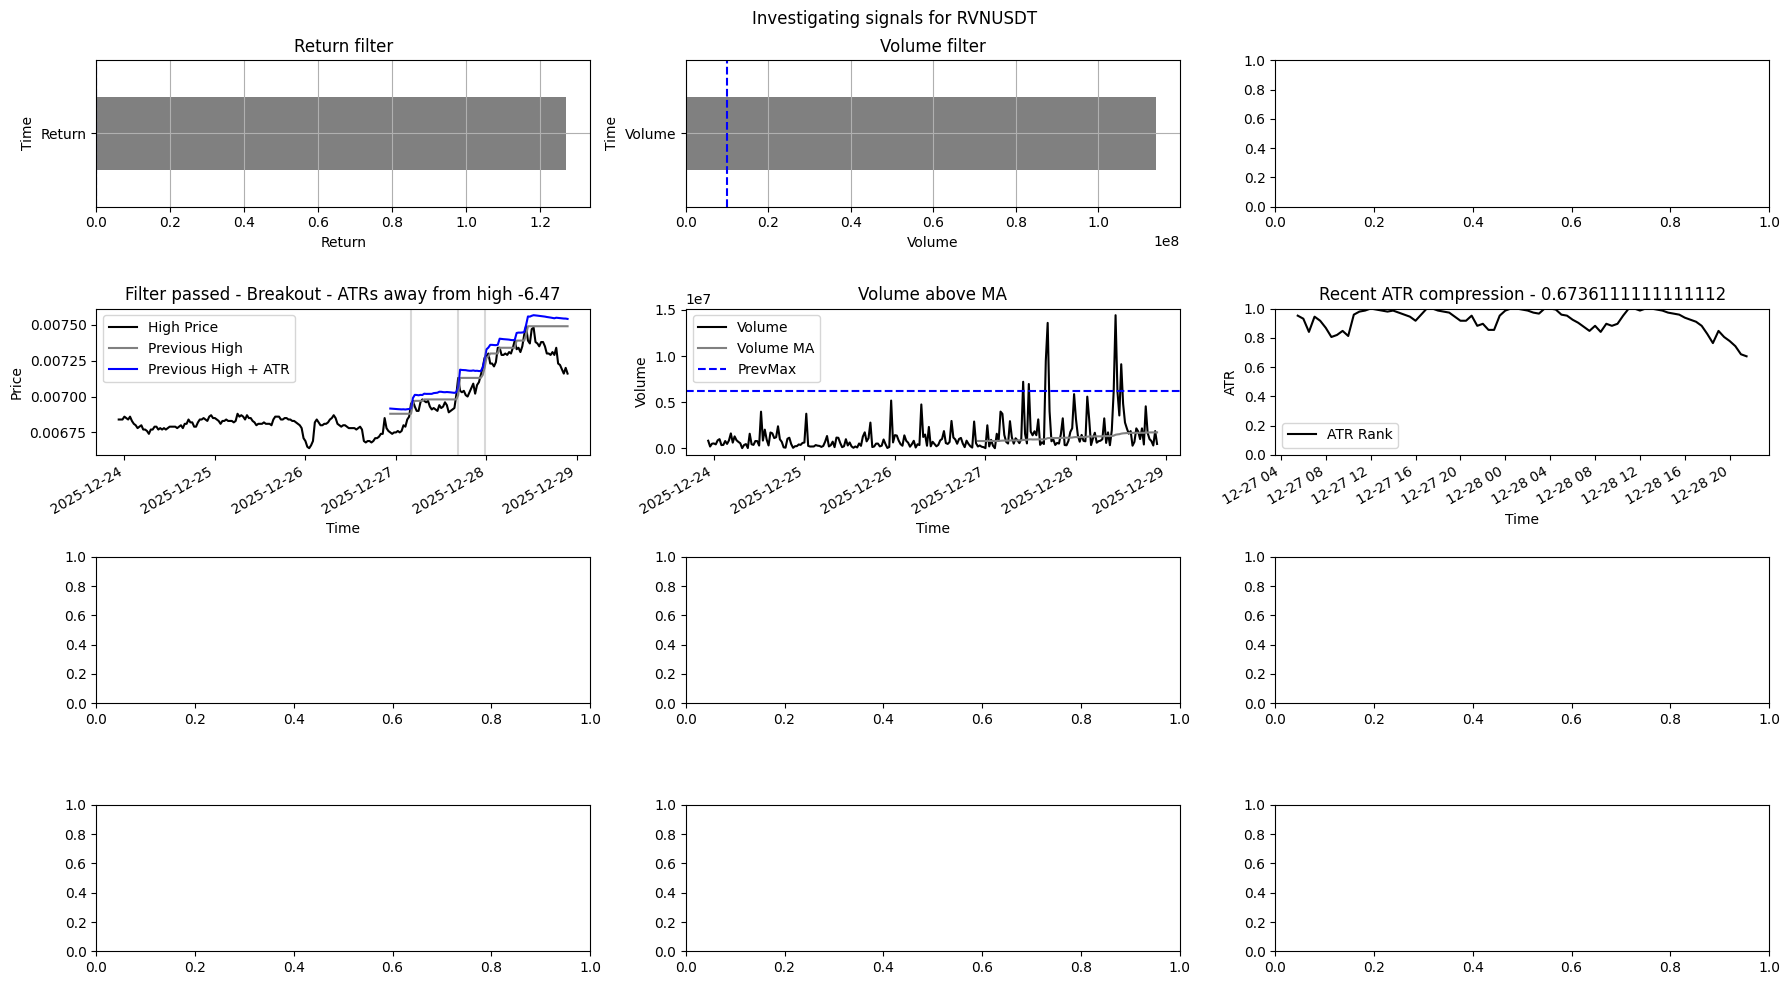

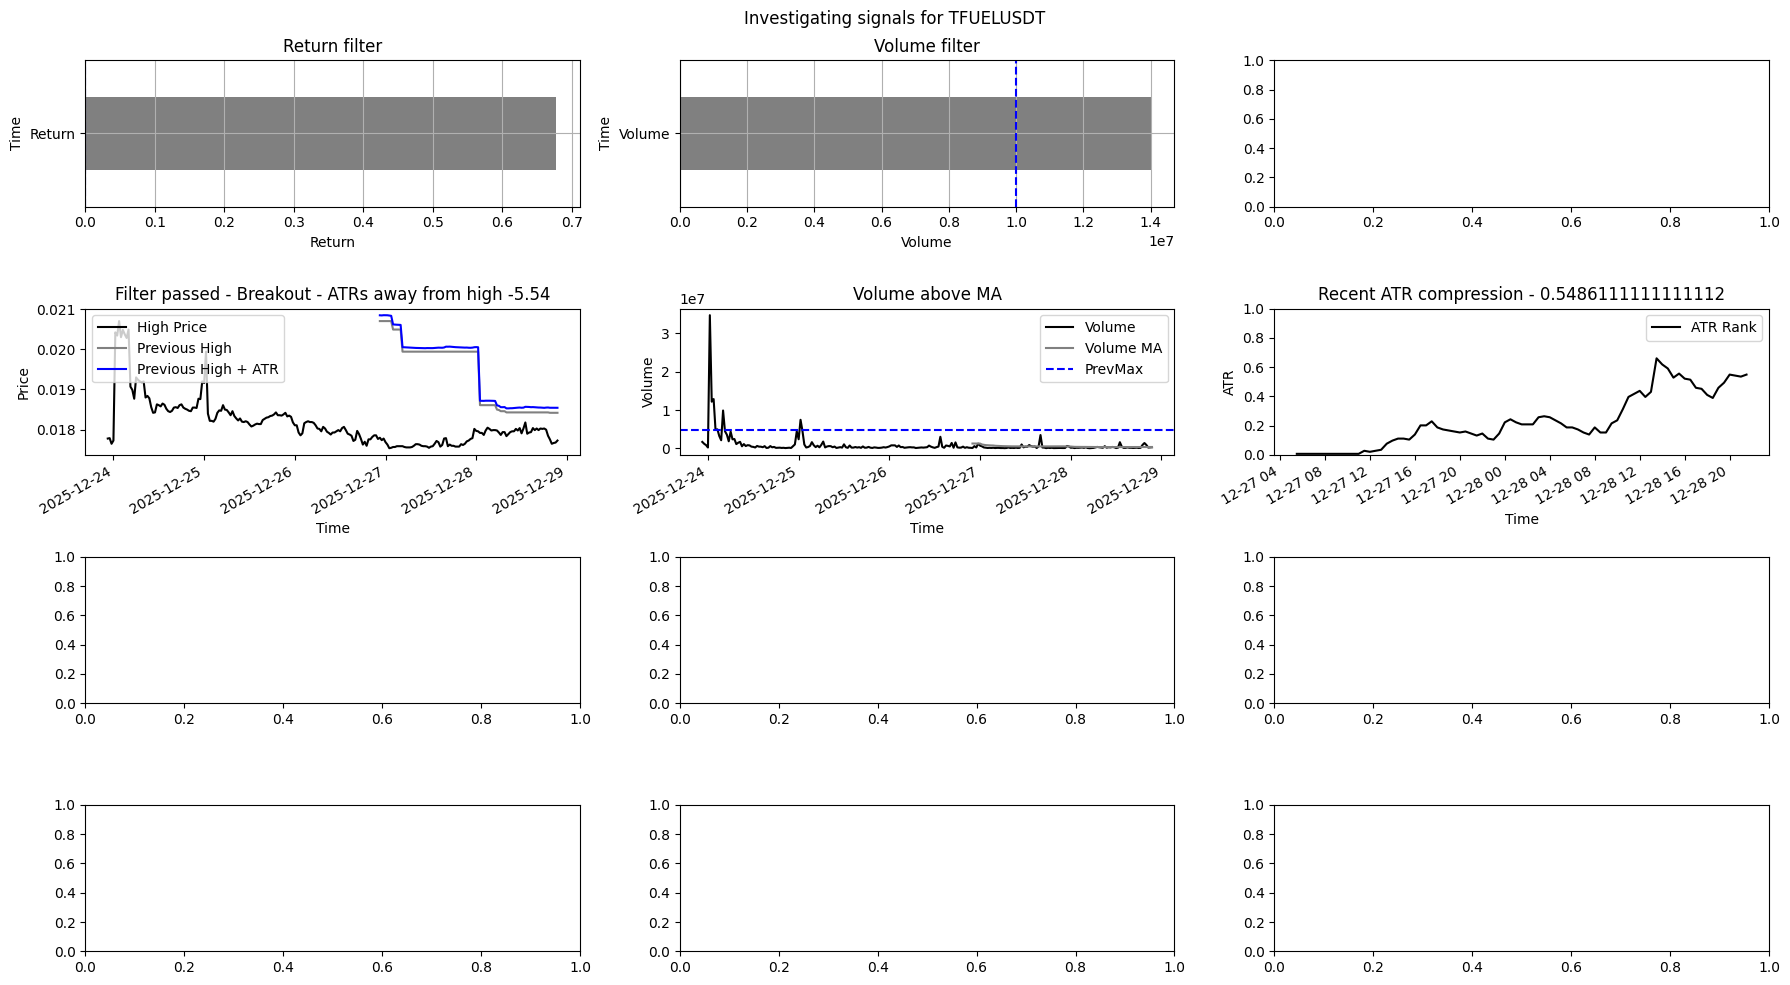

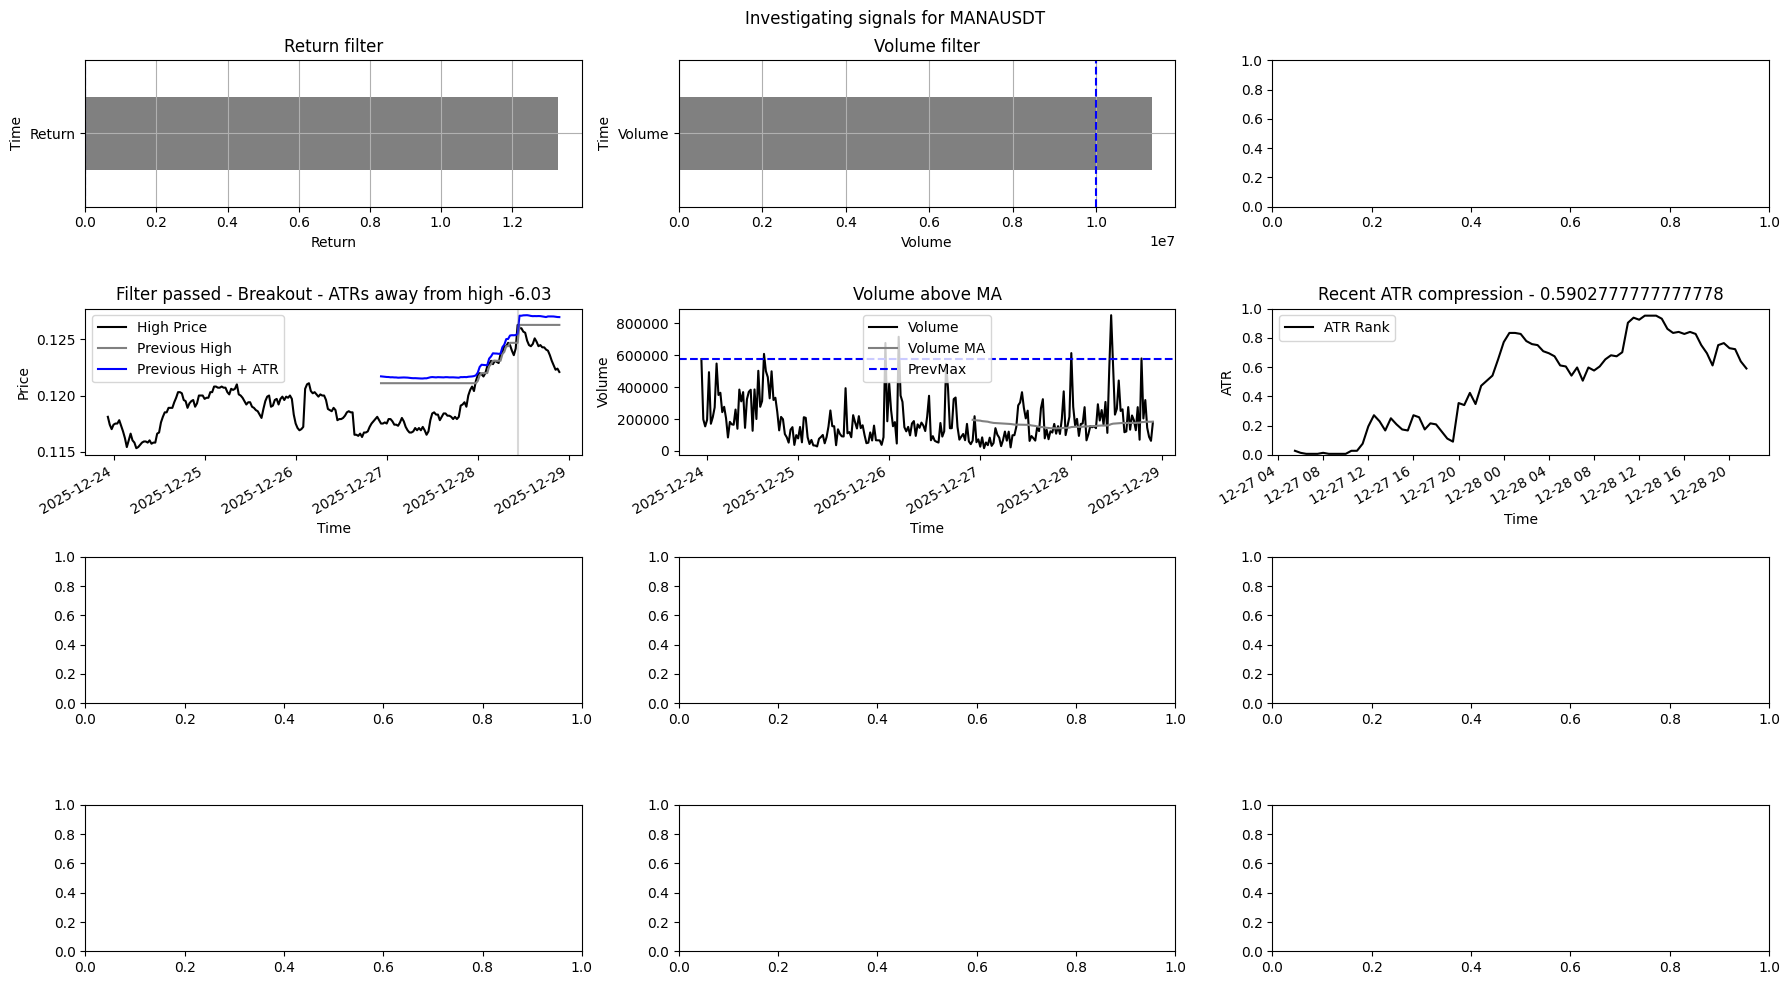

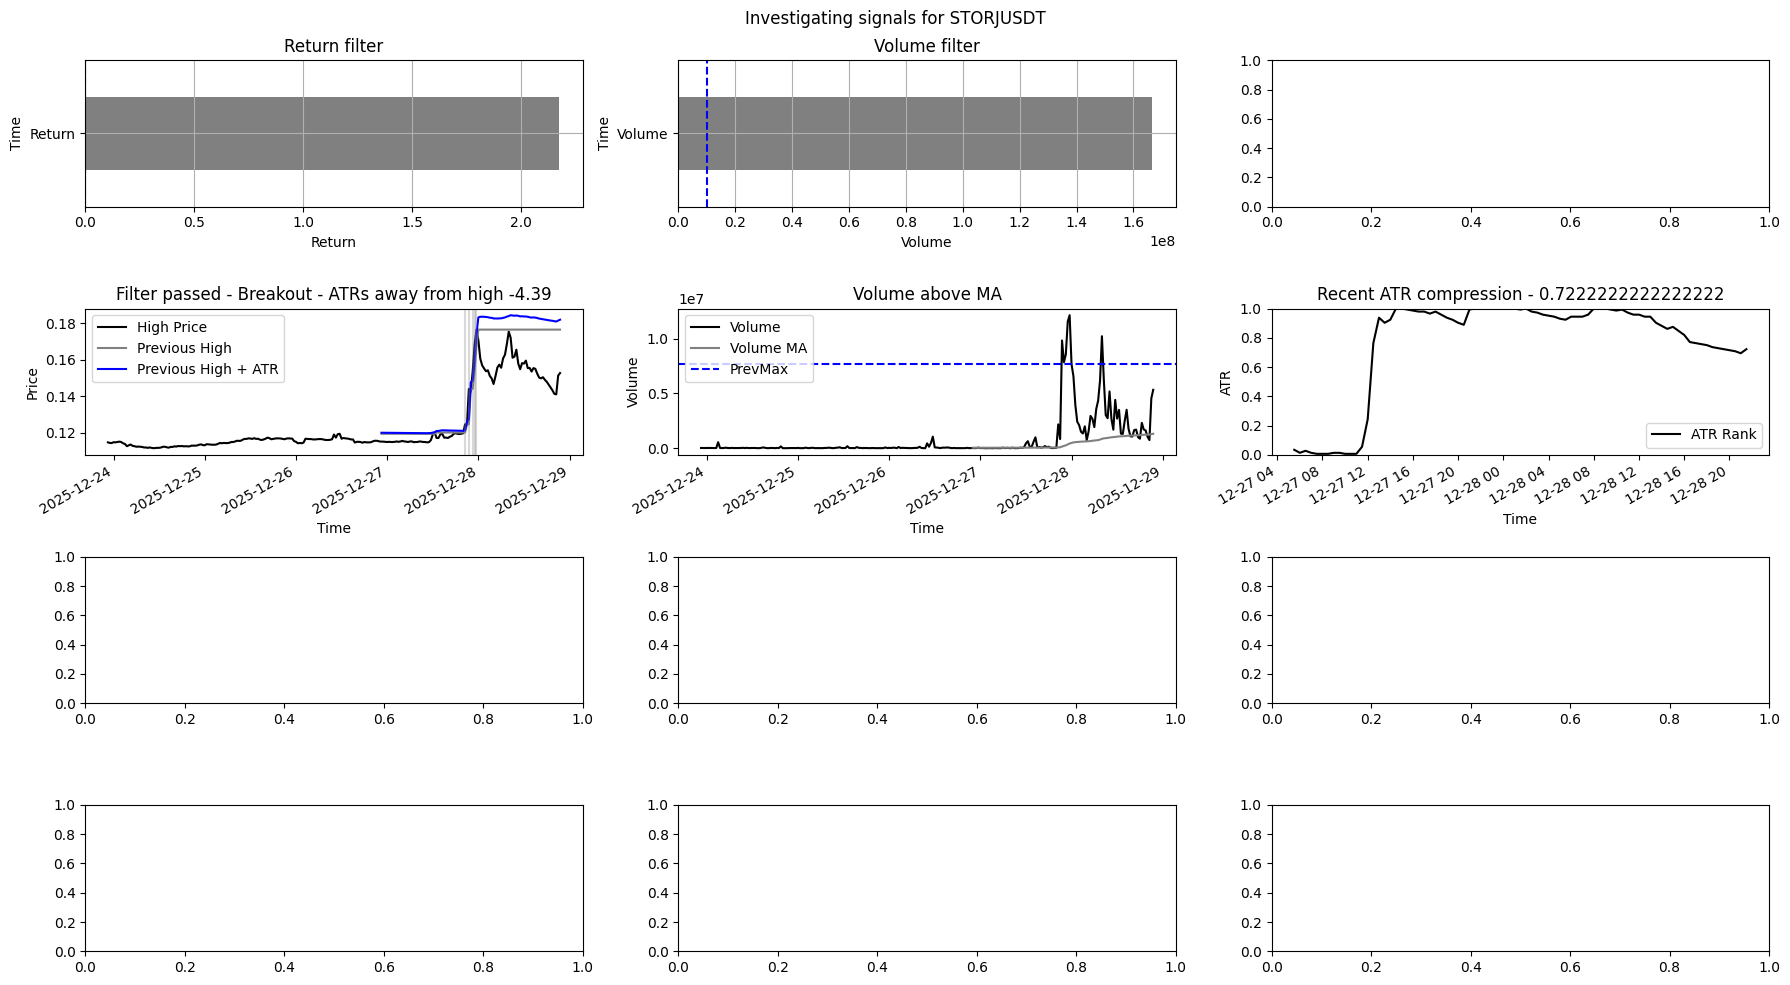

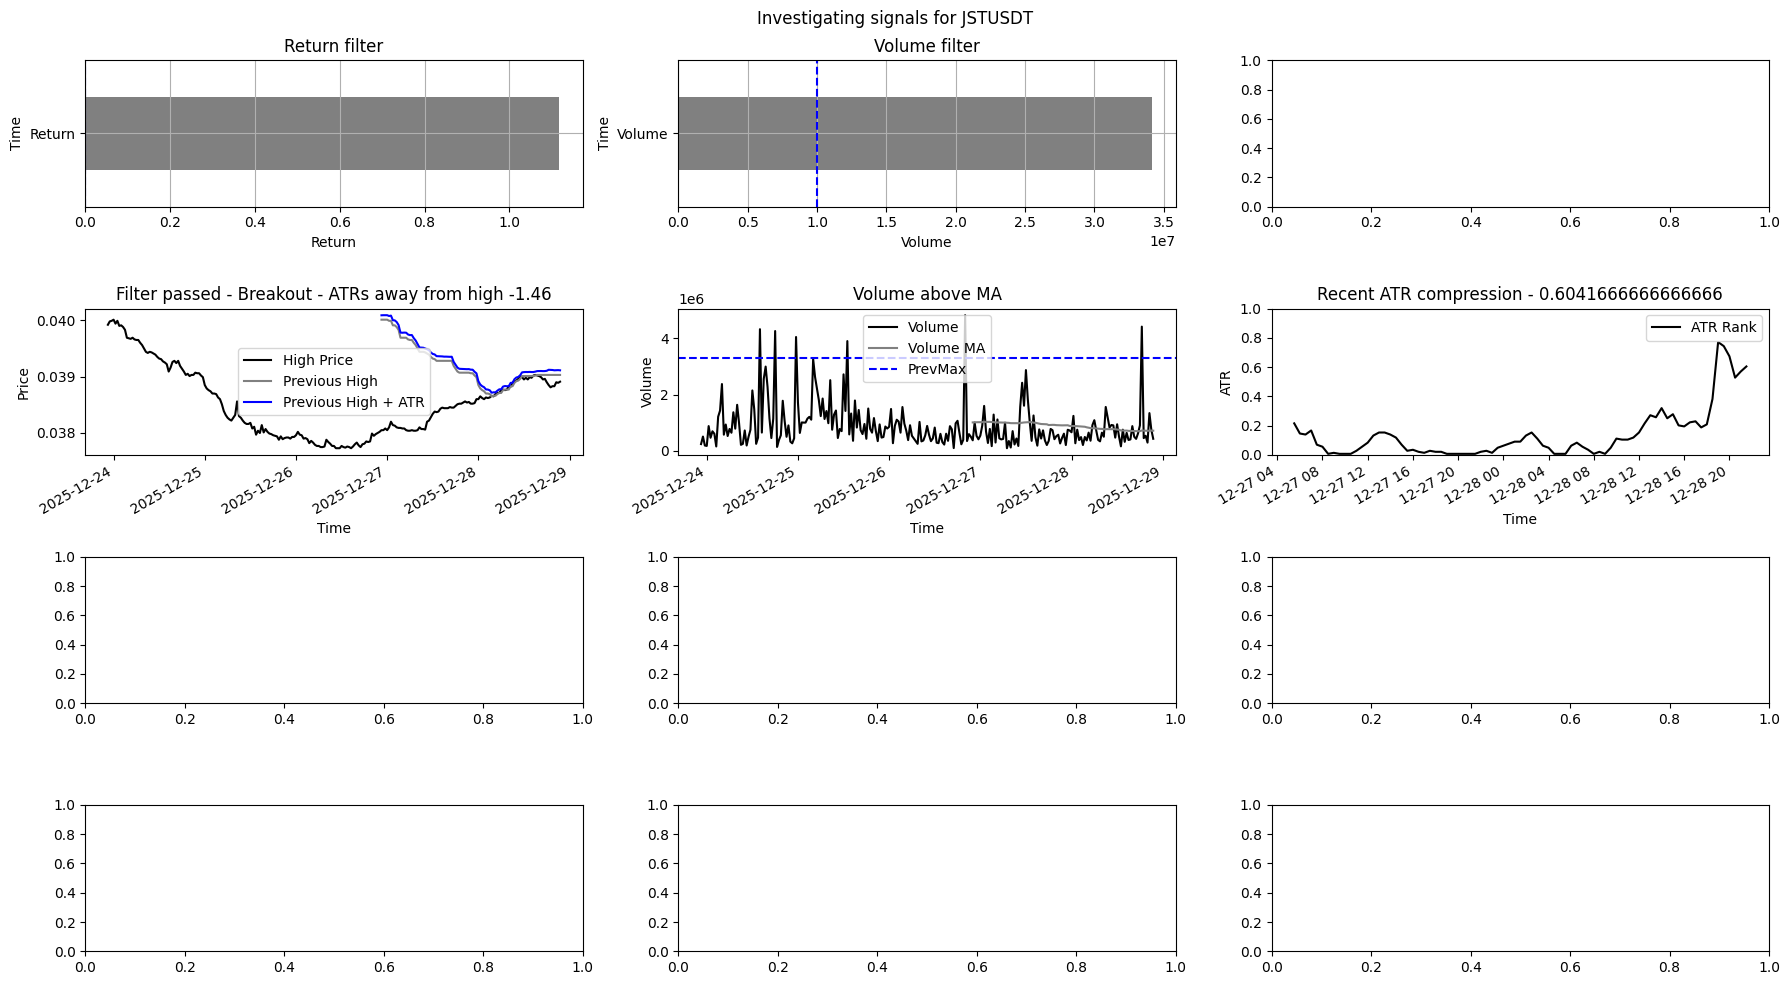

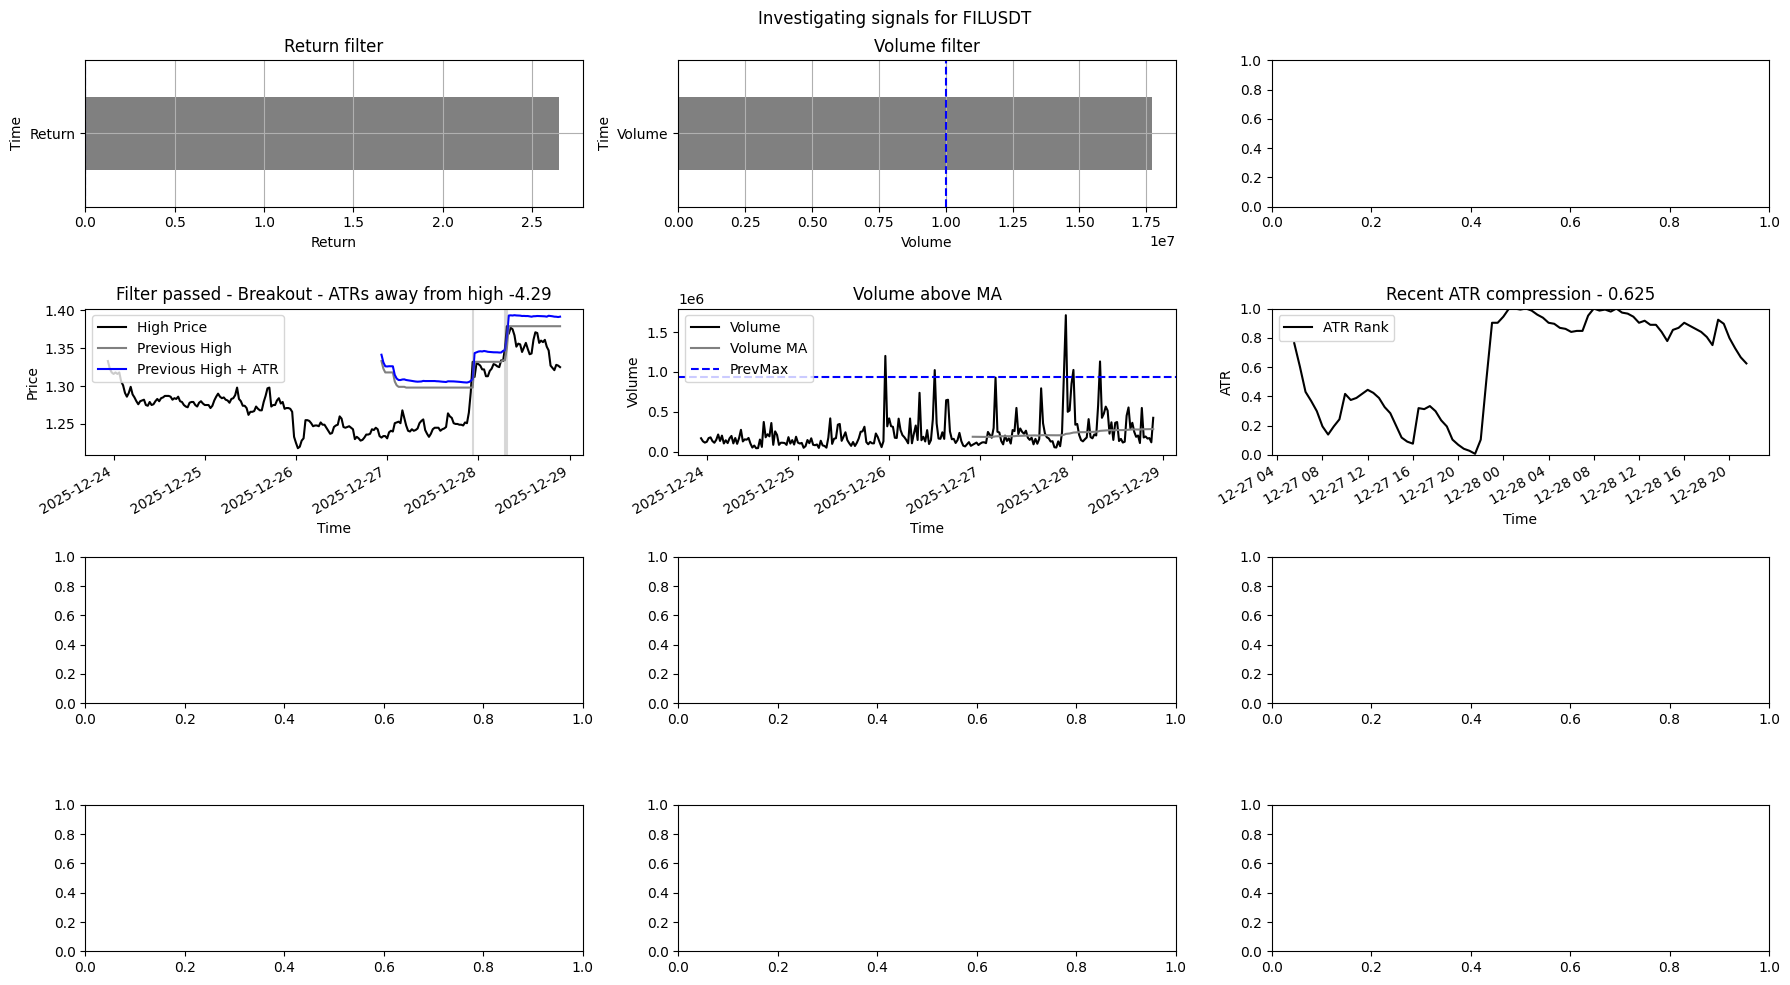

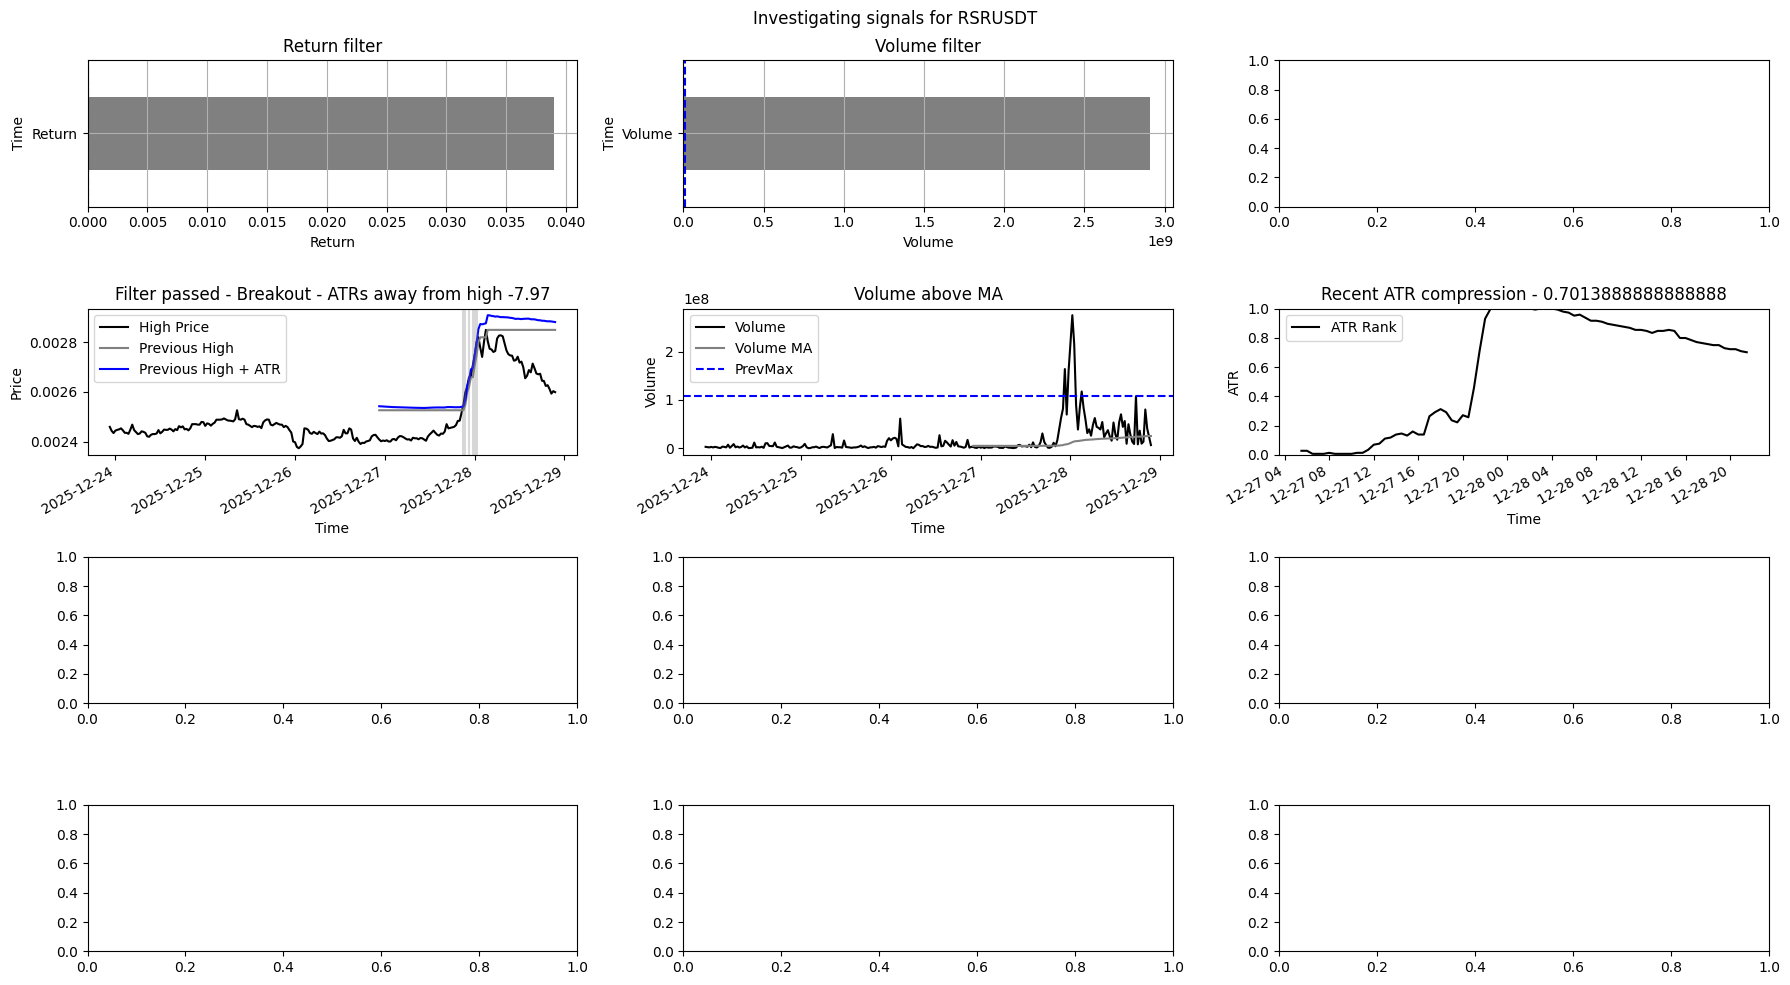

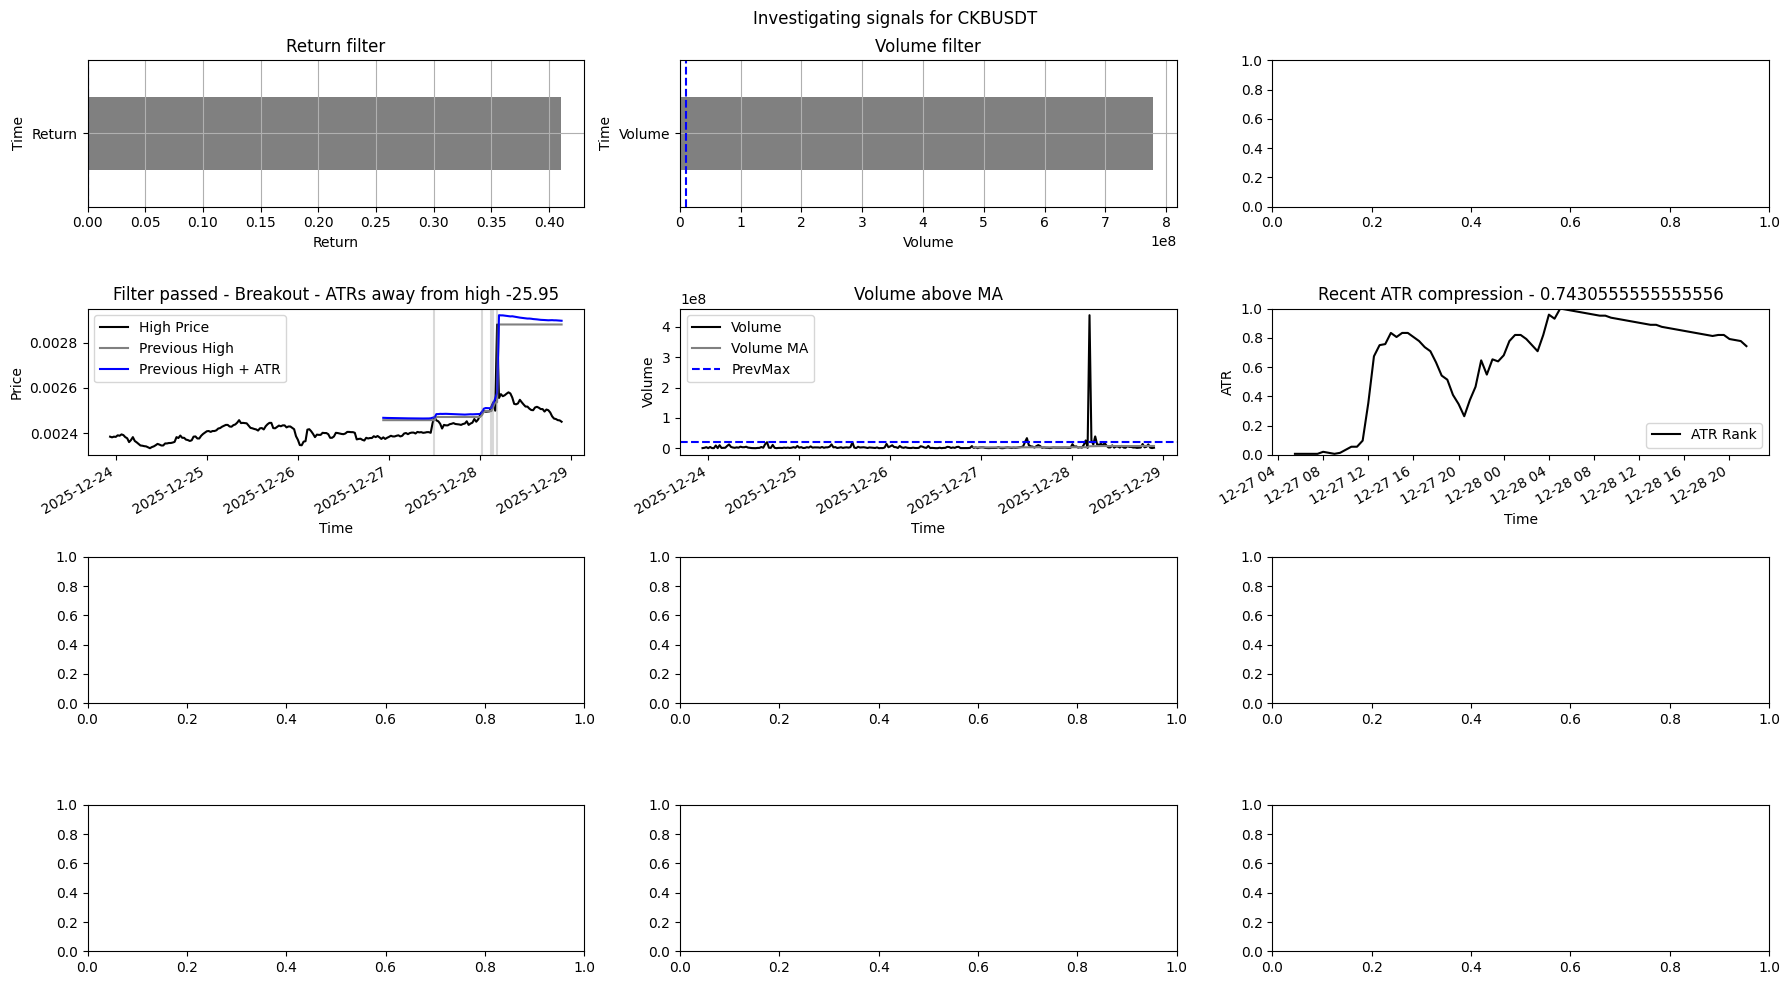

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

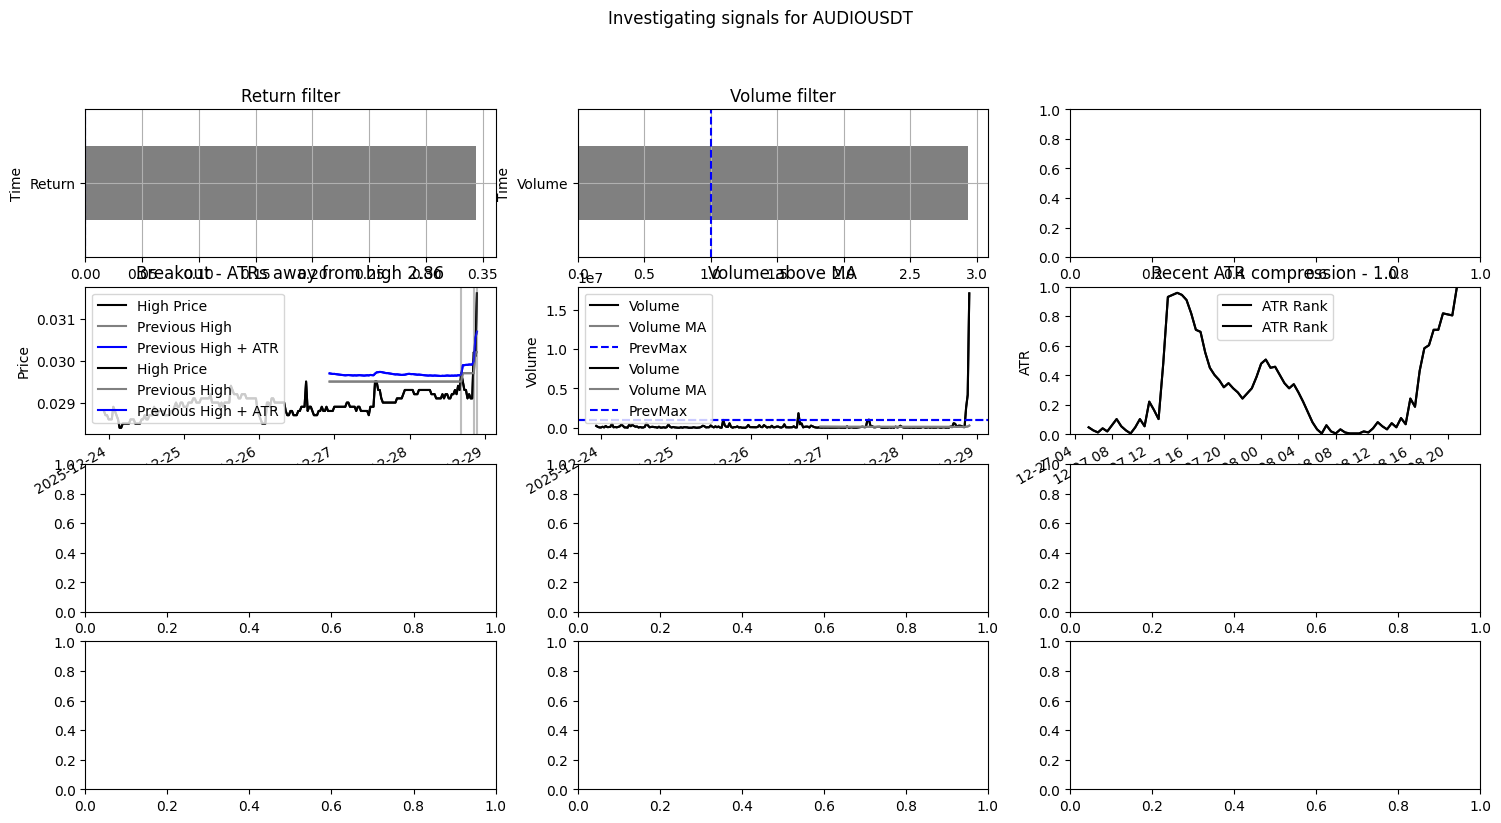

In [3]:
trade_live(
    read_tickers(), 
    [return_filter, volume_filter], # 1
    [breakout, volume_breakout, recent_atr_compression], # 2
    [upper_donchian_breach], # 3
    [],
    3, 
    **read_config()
)


In [181]:
from bot.trade_live import load_ohlcv


df = load_ohlcv('ZECUSDT', '30m', "30 days ago")

In [182]:
close = df['Close']

is_peak = (
    (close >= close.rolling(10).max().shift(1)) # higher than prev 10 bars
    & (close > close.iloc[::-1].rolling(10).max().iloc[::-1].shift(-1)) # higher than next 10 bars
)


/Users/niklasgaertner/Desktop/files/5_investment_idea_repo/intraday_crypto/.venv/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)
/Users/niklasgaertner/Desktop/files/5_investment_idea_repo/intraday_crypto/.venv/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


<Axes: xlabel='Close time'>

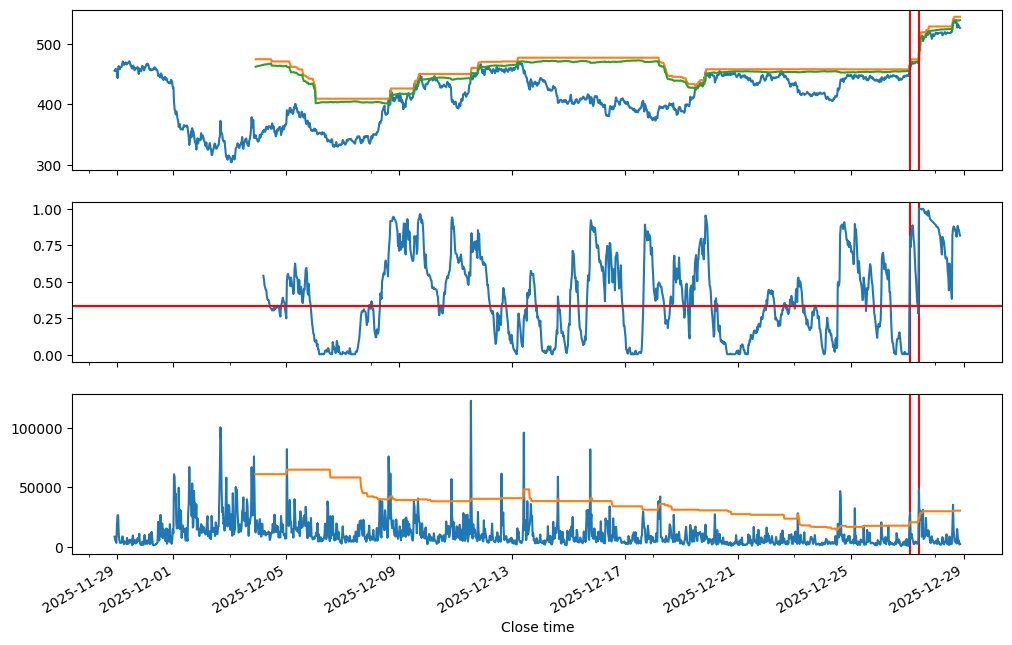

In [183]:
import talib as ta
import matplotlib.pyplot as plt

upper_donchian = df['High'].rolling(24*2*5).max().shift(1)
atr = ta.ATR(df['High'], df['Low'], df['Close'], timeperiod=14)

inds = close.loc[
    (close > (upper_donchian + atr))
    & (atr.rolling(24*2*5).rank(pct=True).shift(1) < 1/3)
    # & (atr.rolling(24*2*5).rank(pct=True) > 1/3)
    & (df['Volume'] > df['Volume'].rolling(24*2*5).quantile(0.975))
].index

fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
close.plot(ax=axs[0])
upper_donchian.plot(ax=axs[0])
(upper_donchian - atr).plot(ax=axs[0])

for ind in inds: 
    axs[0].axvline(ind, color='r')
    axs[1].axvline(ind, color='r')
    axs[2].axvline(ind, color='r')


atr.rolling(24*2*5).rank(pct=True).plot(ax=axs[1])
axs[1].axhline(1/3, color='r')

df['Volume'].plot(ax=axs[2])
df['Volume'].rolling(24*2*5).quantile(0.975).plot(ax=axs[2])


In [ ]:
def find_peak(close):


    close > close.shift(10)


In [29]:
df

,Open time,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore.
Close time,,,,,,,,,,,
2025-09-19 18:29:59.999,2025-09-19 18:00:00,0.2538,0.2540,0.2523,0.2537,62405.0,15811.90800000,300,22165.0,5616.9675,0
2025-09-19 18:59:59.999,2025-09-19 18:30:00,0.2539,0.2546,0.2533,0.2539,44696.0,11342.45600000,162,5839.0,1484.0897,0
2025-09-19 19:29:59.999,2025-09-19 19:00:00,0.2540,0.2542,0.2534,0.2536,56568.0,14356.29530000,180,25293.0,6419.9428,0
2025-09-19 19:59:59.999,2025-09-19 19:30:00,0.2536,0.2537,0.2526,0.2526,75937.0,19239.20890000,287,36291.0,9193.3215,0
2025-09-19 20:29:59.999,2025-09-19 20:00:00,0.2527,0.2536,0.2526,0.2534,15816.0,4003.67950000,91,8761.0,2217.5463,0
...,...,...,...,...,...,...,...,...,...,...,...
2025-12-28 15:29:59.999,2025-12-28 15:00:00,0.1502,0.1524,0.1490,0.1500,1081963.0,163152.13850000,2026,564329.0,85127.0625,0
2025-12-28 15:59:59.999,2025-12-28 15:30:00,0.1501,0.1503,0.1483,0.1497,1069803.0,159729.26680000,2000,556842.0,83127.8567,0
2025-12-28 16:29:59.999,2025-12-28 16:00:00,0.1495,0.1499,0.1464,0.1467,1656223.0,244381.60110000,2557,764257.0,112775.8953,0
